In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [5]:
import patoolib
import pathlib

In [18]:
#patoolib.extract_archive("151_animals_classification_dataset.zip")
data_dir = pathlib.Path("/content/151_animals_classification_dataset/dataset/dataset")

In [19]:
print("Total Images: ",len(list(data_dir.glob('*/*.jpg'))))

Total Images:  6270


In [20]:
batch_size = 32
img_height = 224
img_width = 224

In [21]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6270 files belonging to 151 classes.
Using 5016 files for training.


In [22]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6270 files belonging to 151 classes.
Using 1254 files for validation.


In [23]:
class_names = train_ds.class_names
print(class_names)

['acinonyx-jubatus', 'aethia-cristatella', 'agalychnis-callidryas', 'agkistrodon-contortrix', 'ailuropoda-melanoleuca', 'ailurus-fulgens', 'alces-alces', 'anas-platyrhynchos', 'ankylosaurus-magniventris', 'apis-mellifera', 'aptenodytes-forsteri', 'aquila-chrysaetos', 'ara-macao', 'architeuthis-dux', 'ardea-herodias', 'balaenoptera-musculus', 'betta-splendens', 'bison-bison', 'bos-gaurus', 'bos-taurus', 'bradypus-variegatus', 'branta-canadensis', 'canis-lupus', 'canis-lupus-familiaris', 'carcharodon-carcharias', 'cardinalis-cardinalis', 'cathartes-aura', 'centrochelys-sulcata', 'centruroides-vittatus', 'ceratitis-capitata', 'ceratotherium-simum', 'chelonia-mydas', 'chrysemys-picta', 'circus-hudsonius', 'codium-fragile', 'coelacanthiformes', 'colaptes-auratus', 'connochaetes-gnou', 'correlophus-ciliatus', 'crocodylus-niloticus', 'crotalus-atrox', 'crotophaga-sulcirostris', 'cryptoprocta-ferox', 'cyanocitta-cristata', 'danaus-plexippus', 'dasypus-novemcinctus', 'delphinapterus-leucas', 'd

In [24]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


In [25]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [29]:
normalization_layer = layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

print(np.min(first_image), np.max(first_image))

0.0 1.0


In [31]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        1

In [32]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
157/157 [==============================] - 370s 2s/step - loss: 4.8672 - accuracy: 0.0181 - val_loss: 4.6589 - val_accuracy: 0.0327
Epoch 2/10
157/157 [==============================] - 365s 2s/step - loss: 4.3420 - accuracy: 0.0785 - val_loss: 4.2448 - val_accuracy: 0.0973
Epoch 3/10
157/157 [==============================] - 364s 2s/step - loss: 3.7498 - accuracy: 0.1625 - val_loss: 3.9160 - val_accuracy: 0.1380
Epoch 4/10
157/157 [==============================] - 366s 2s/step - loss: 3.0171 - accuracy: 0.2899 - val_loss: 3.7989 - val_accuracy: 0.1683
Epoch 5/10
157/157 [==============================] - 355s 2s/step - loss: 2.1130 - accuracy: 0.4673 - val_loss: 4.0788 - val_accuracy: 0.1818
Epoch 6/10
157/157 [==============================] - 329s 2s/step - loss: 1.1513 - accuracy: 0.6926 - val_loss: 4.8968 - val_accuracy: 0.1746
Epoch 7/10
157/157 [==============================] - 332s 2s/step - loss: 0.4643 - accuracy: 0.8760 - val_loss: 5.6703 - val_accuracy: 0.1850

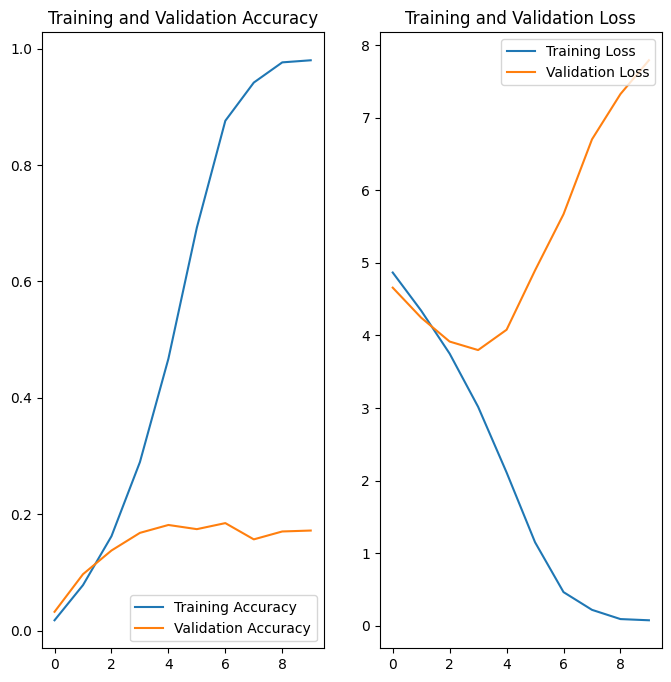

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [34]:
!pip install pyyaml h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
model.save('animal_classification_model.h5')

In [47]:
path = "/content/bison2.jpg"
img = tf.keras.utils.load_img(path, target_size=(img_height, img_width))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 48ms/step
This image most likely belongs to bison-bison with a 85.48 percent confidence.
